In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline
plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
filepath = '../data/fma_metadata/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

In [4]:
df_small = tracks[tracks[('set', 'subset')] == 'small']

In [5]:
df_small.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
140             1  2008-11-26 01:49:59  2007-05-22 00:00:00      NaN   
141             0  2008-11-26 01:49:57  2009-01-16 00:00:00      NaN   

                                                                           \
         favorites  id                                        information   
track_id                                                                    
2                4   1                                            <p></p>   
5                4   1                                            <p></p>   
10               4   6                                                NaN   
140              1  61  <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...   
141              1  60  <p>A full ensamble of strings, drums, electron...   

                                                                              \
         listens                        producer tags                  title   
track_id                                                                       
2           6073                             NaN   []   AWOL - A Way Of Life   
5           6073                             NaN   []   AWOL - A Way Of Life   
10         47632                             NaN   []      Constant Hitmaker   
140         1300  Alec K. Refearn, Rob Pemberton   []         The Blind Spot   
141         1304                             NaN   []  Every Man For Himself   

                                     artist                  \
         tracks   type    active_year_begin active_year_end   
track_id                                                      
2             7  Album  2006-01-01 00:00:00             NaN   
5             7  Album  2006-01-01 00:00:00             NaN   
10            2  Album                  NaN             NaN   
140           1  Album  1999-01-01 00:00:00             NaN   
141           2  Album  1999-01-01 00:00:00             NaN   

                                                             \
                                          associated_labels   
track_id                                                      
2                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
140                                                     NaN   
141                                                     NaN   

                                                                      \
                                                        bio comments   
track_id                                                               
2         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...        0   
10        <p><span style="font-family:Verdana, Geneva, A...        3   
140       <p>The Eyesores originally formed in 1997 orig...        0   
141       <p>The Eyesores originally formed in 1997 orig...        0   

                                                                        \
                 date_created favorites  id   latitude        location   
track_id                                                                 
2         2008-11-26 01:42:32         9   1  40.058324      New Jersey   
5         2008-11-26 01:42:32         9   1  40.058324      New Jersey   
10        2008-11-26 01:42:55        74   6        NaN             NaN   
140       2008-11-26 01:47:44        11  54  41.823989  Providence, RI   
141       2008-11-26 01:47:44        11  54  41.823989  Providence, RI  

In [6]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (album, comments)            8000 non-null   int64  
 1   (album, date_created)        8000 non-null   object 
 2   (album, date_released)       5337 non-null   object 
 3   (album, engineer)            1142 non-null   object 
 4   (album, favorites)           8000 non-null   int64  
 5   (album, id)                  8000 non-null   int64  
 6   (album, information)         6502 non-null   object 
 7   (album, listens)             8000 non-null   int64  
 8   (album, producer)            1404 non-null   object 
 9   (album, tags)                8000 non-null   object 
 10  (album, title)               8000 non-null   object 
 11  (album, tracks)              8000 non-null   int64  
 12  (album, type)                7769 non-null   object 
 13  (artist, active_

### First and last track in dataset by date

In [7]:
print(df_small[('track','date_created')].min())
print(df_small[('track','date_created')].max())

2008-11-25 17:49:06
2017-03-24 19:40:47


In [8]:
type(df_small[('track','date_created')].iloc[0])

str

### Graph songs created per year per genre

In [9]:
# Convert date string to datetime and extract year
df_small['year_created'] = pd.to_datetime(df_small[('track','date_created')])
df_small['year_created'] = pd.DatetimeIndex(df_small['year_created']).year

<ipython-input-9-77dffd81e801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['year_created'] = pd.to_datetime(df_small[('track','date_created')])
<ipython-input-9-77dffd81e801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['year_created'] = pd.DatetimeIndex(df_small['year_created']).year


In [16]:
# Create pivot table
table = pd.pivot_table(df_small, index=['year_created'],
                    columns=[('track','genre_top')], aggfunc='count')
# Remove duplicate information columns
table = table['album','comments']

In [17]:
table.fillna(0, inplace=True)

In [18]:
table

"(track, genre_top)",Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Pop,Rock
year_created,,,,,,,,
2008,6.0,27.0,73.0,9.0,0.0,62.0,17.0,54.0
2009,34.0,88.0,123.0,129.0,31.0,106.0,106.0,75.0
2010,104.0,144.0,56.0,73.0,15.0,131.0,99.0,64.0
2011,115.0,162.0,93.0,63.0,32.0,190.0,146.0,86.0
2012,145.0,120.0,96.0,145.0,12.0,141.0,114.0,111.0
2013,128.0,102.0,150.0,133.0,131.0,57.0,114.0,115.0
2014,148.0,85.0,106.0,163.0,88.0,86.0,64.0,137.0
2015,173.0,191.0,139.0,102.0,423.0,113.0,190.0,176.0
2016,142.0,75.0,160.0,158.0,252.0,102.0,130.0,177.0


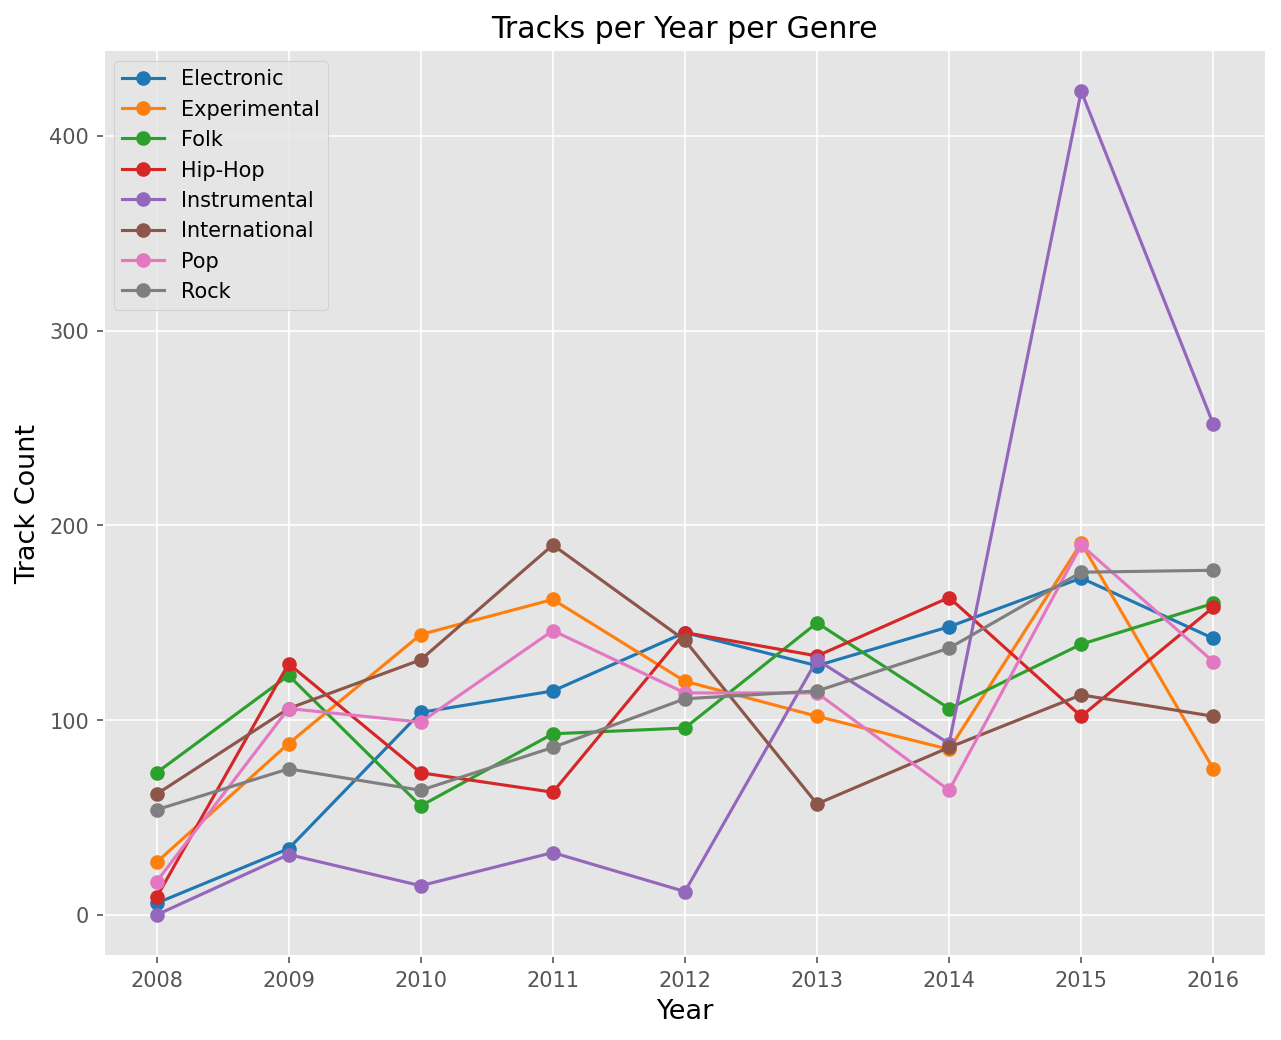

In [41]:
fig, ax = plt.subplots(figsize=(10,8), dpi = 150)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

for i, genre in enumerate(table.columns.to_list()):
    ax.plot(table.index[:-1],
            table.loc[:2016,genre].values,
            c=colors[i],
            marker = 'o',
            label = genre)
    
ax.set_title('Tracks per Year per Genre')
ax.set_xlabel('Year', fontsize=13, c='k')
ax.set_ylabel('Track Count', fontsize=13, c='k')
ax.legend()
plt.savefig('../imgs/tracks_per_genre_per_year.png')

### Average song length per genre

In [38]:
# Gather average song duration per genre
avg_duration = df_small.groupby(('track','genre_top')).aggregate('mean')[('track','duration')]

# Sort the array
avg_duration = avg_duration.sort_values(ascending=True)

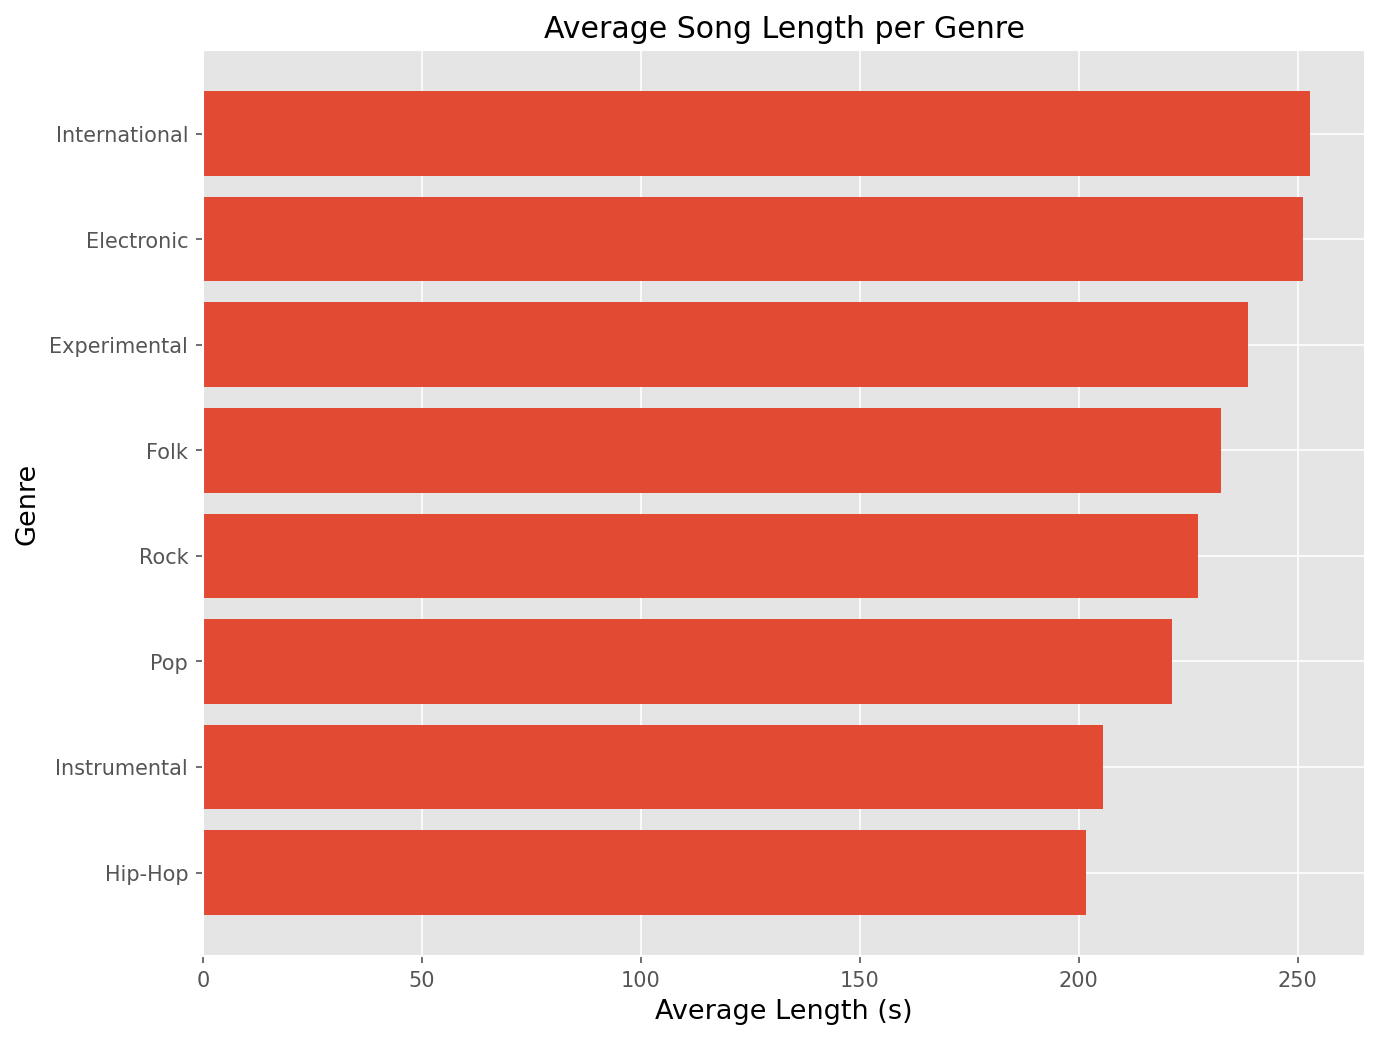

In [42]:
fig, ax = plt.subplots(figsize=(10,8), dpi = 150)

ax.barh(avg_duration.index,
       avg_duration.values)
    
ax.set_title('Average Song Length per Genre')
ax.set_xlabel('Average Length (s)', fontsize=13, c='k')
ax.set_ylabel('Genre', fontsize=13, c='k')
plt.savefig('../imgs/avg_length_per_genre.png')